# Linear Regression 

![title](img/reg1.png)

![title](img/reg2.jpg)

### Assumptions
---
1) No. of cases - 20:1

-----

2) Missing Data - Needs to be removed before building the model

----

3) Outliers - Treatment of Outliers neccessary

-----

4) Multicollinearity - VIF 

------


### Importing Packages

In [5]:
%matplotlib inline
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats
import seaborn as sns

In [6]:
data = pd.read_excel('data/concrete_data.xls')

In [7]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


##### Features Exploration

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


##### Renaming the columns - Ex Use Case

In [10]:
data.columns = ['cement_component', 'furnace_slag', 'flay_ash', 'water_component', 'superplasticizer', \
                'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_strength']

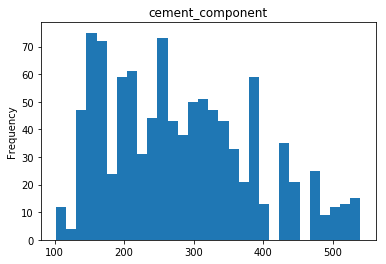

In [11]:
### Univariate Analysis
data.cement_component.plot.hist(bins=30, title = 'cement_component')

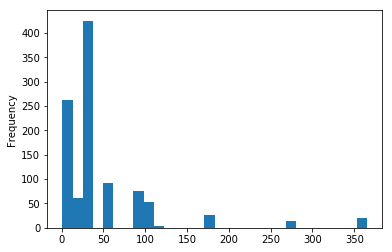

In [12]:
data.age.plot.hist(bins=30)

In [13]:
### Removing Zeros
data1 = data.replace(0, np.NaN)
data1.dropna(inplace = True)
data1

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
224,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,3,7.749710
225,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,14,17.822955
226,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,28,24.241976
227,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,56,32.853531
228,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,100,39.231184
229,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,3,17.995324
230,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,14,30.385207
231,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,28,45.705364
232,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,56,50.773013
233,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,100,53.903234


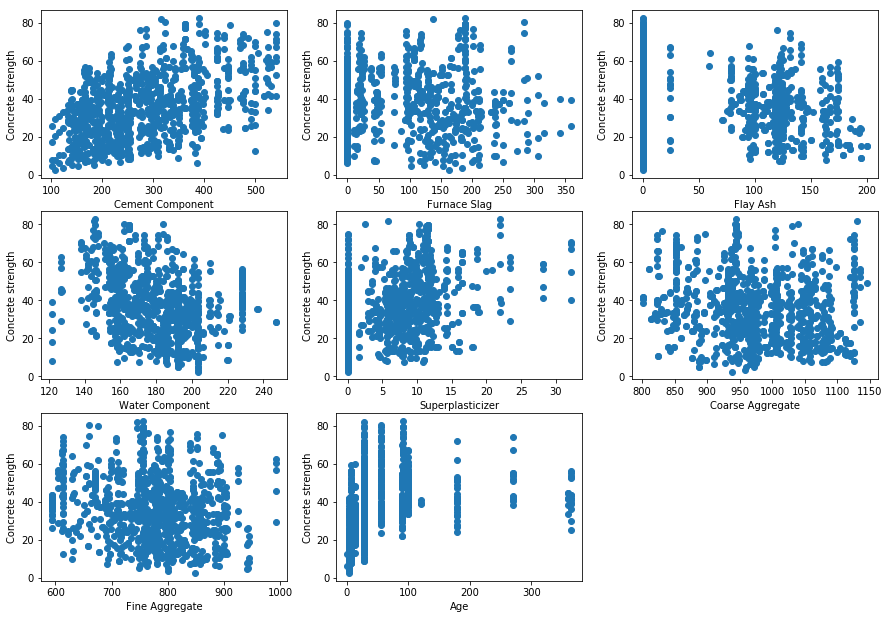

In [14]:
## Plotting Scatter Plots Between the Response and Exploratory Variables
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
    plt.subplot(3,3,plot_count)
    plt.scatter(data[feature], data['concrete_strength'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete strength')
    plot_count+=1
plt.show()

In [17]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                   cement_component  furnace_slag  flay_ash  water_component  superplasticizer  \
cement_component              1.000        -0.275    -0.397           -0.082             0.093   
furnace_slag                 -0.275         1.000    -0.324            0.107             0.043   
flay_ash                     -0.397        -0.324     1.000           -0.257             0.377   
water_component              -0.082         0.107    -0.257            1.000            -0.657   
superplasticizer              0.093         0.043     0.377           -0.657             1.000   
coarse_aggregate             -0.109        -0.284    -0.010           -0.182            -0.266   
fine_aggregate               -0.223        -0.282     0.079           -0.451             0.223   
age                           0.082        -0.044    -0.154            0.278            -0.193   
concrete_strength             0.498         0.135    -0.106           -0.290             0.366   

                   

In [18]:
test = data.corr()
test.concrete_strength.sort_values()

water_component     -0.290
fine_aggregate      -0.167
coarse_aggregate    -0.165
flay_ash            -0.106
furnace_slag         0.135
age                  0.329
superplasticizer     0.366
cement_component     0.498
concrete_strength    1.000
Name: concrete_strength, dtype: float64

In [19]:
test = data1.corr()
test.concrete_strength.sort_values()

water_component     -0.236
flay_ash            -0.186
furnace_slag        -0.173
coarse_aggregate    -0.036
fine_aggregate       0.042
superplasticizer     0.220
cement_component     0.428
age                  0.559
concrete_strength    1.000
Name: concrete_strength, dtype: float64

In [20]:
test = data1.corr(method='spearman')
test.concrete_strength.sort_values()

water_component     -0.280
flay_ash            -0.187
furnace_slag        -0.162
coarse_aggregate     0.003
fine_aggregate       0.026
superplasticizer     0.272
cement_component     0.461
age                  0.607
concrete_strength    1.000
Name: concrete_strength, dtype: float64

In [23]:
test = data1.corr

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


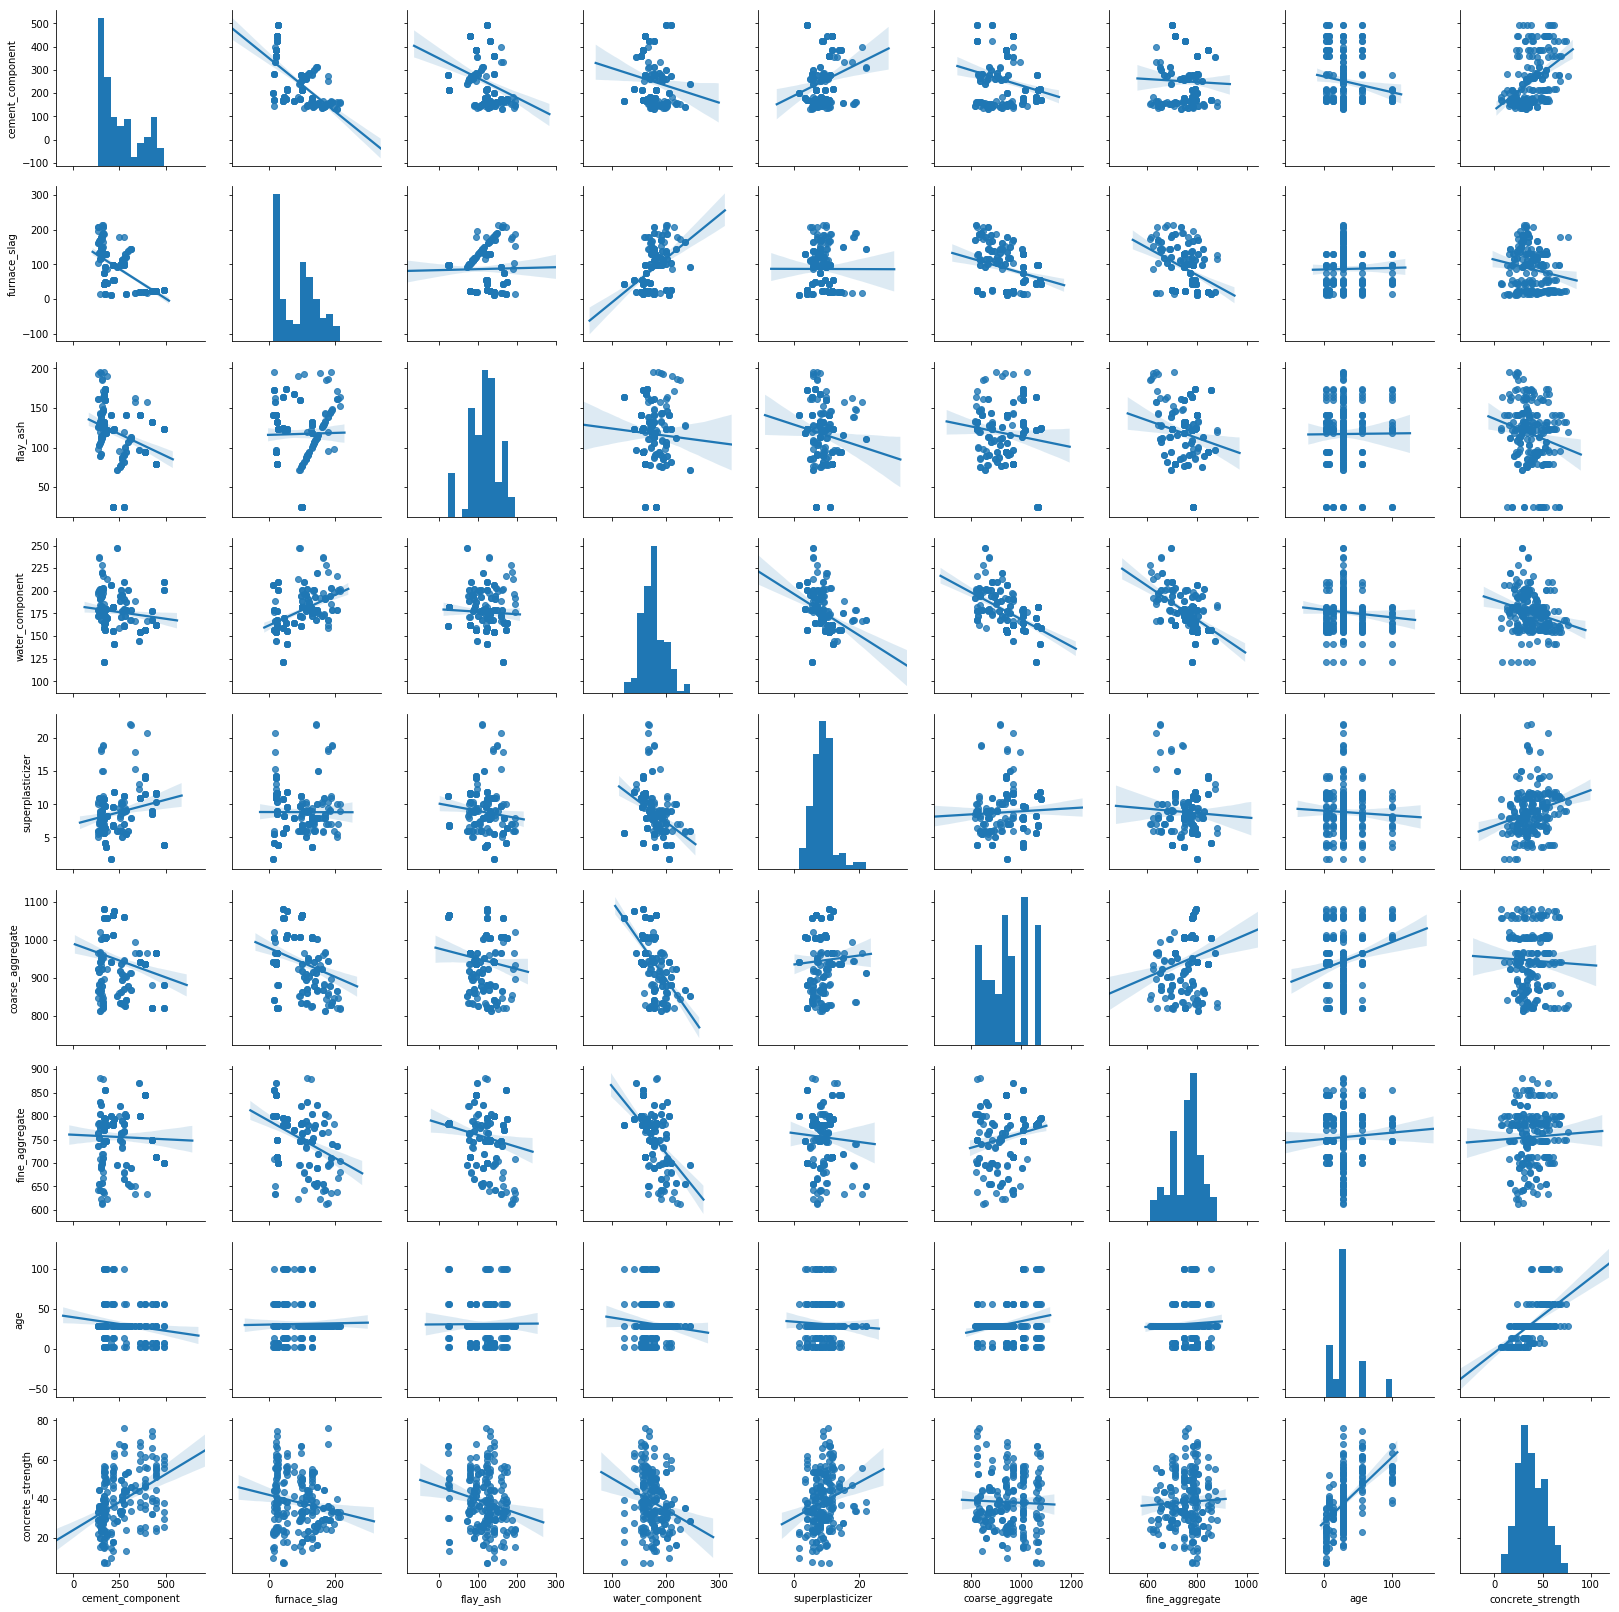

In [28]:
## Calculating Pair Plot Between All Features
sns.pairplot(data1, vars=data.columns, kind='reg')
plt.show()

## Calculating Weights:
    
    1) Normal Equation method
   
![title](img/ne.jpg)
    
    2) Gradient Descent method-when there are large samples (say >100k)
    
![title](img/gd.png)  

In [29]:
## Convert the data into array type
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [30]:
X.shape

(1030, 8)

In [31]:
y.shape

(1030,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(772, 8)
(258, 8)
(772,)
(258,)


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print ('Intercept: %f'%lr.intercept_)
print ('Coefficients: %s'%str(lr.coef_))

Intercept: -40.613287
Coefficients: [ 0.12317824  0.10974542  0.09567819 -0.12077729  0.30845472  0.024116
  0.02577196  0.11804872]


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
features = data.columns[:-1]
features

Index(['cement_component', 'furnace_slag', 'flay_ash', 'water_component', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

In [38]:
print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))

Features: Index(['cement_component', 'furnace_slag', 'flay_ash', 'water_component', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')
R2 score: 0.598772


In [39]:
print ('Mean Absoulte Error:', mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absoulte Error: 8.62803549898489
Mean Squared Error: 120.19206188108772


## Overfitting and Underfitting

![title](img/fitting.png)

In [40]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

def load_extended_boston():
    boston = load_boston()
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [41]:
X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Tradeoff between model complexity against training and test accuracy

![title](img/tradeoff.png)

### Regularization - Explicitly restricting the model to avoid overfitting

![title](img/RidgeandLasso.jpg)

### Ridge regression

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [43]:
ridge10 = Ridge(alpha=2).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.73


### Lasso Regression 

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [45]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


## GridSearch CV

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100],
'max_iter': [2000, 5000, 10000, 15000, 20000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100], 'max_iter': [2000, 5000, 10000, 15000, 20000]}


In [47]:
grid_search = GridSearchCV(Lasso(), param_grid)

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100], 'max_iter': [2000, 5000, 10000, 15000, 20000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))

Test set score: 0.77
Best parameters: {'alpha': 0.01, 'max_iter': 2000}
